
**Connecter Drive à Colab**
La première chose que vous voulez faire lorsque vous travaillez sur Colab est de monter votre Google Drive. Cela vous permettra d'accéder à n'importe quel répertoire de votre Drive dans le notebook Colab.
pour pouvoir utilisé le fichiés CSV deouis votre dRIVE

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Configurer PySpark dans Colab**

[texte du lien](https://)**<h1 >Instalation du Java 8**

In [ ]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

**<h1>Instalation du Spark </h1>**

In [ ]:
!wget -q https://dlcdn.apache.org/spark/spark-3.2.0/spark-3.2.0-bin-hadoop3.2.tgz


In [ ]:
import os

In [ ]:
print(os.listdir('./sample_data'))


['anscombe.json', 'README.md', 'california_housing_test.csv', 'mnist_train_small.csv', 'california_housing_train.csv', 'mnist_test.csv']


In [ ]:
!tar xf spark-3.2.0-bin-hadoop3.2.tgz

In [ ]:
!pip install -q findspark

In [ ]:
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"


In [ ]:
os.environ["SPARK_HOME"] = "/content/spark-3.2.0-bin-hadoop3.2"

In [ ]:
import findspark


In [ ]:
findspark.find()

'/content/spark-3.2.0-bin-hadoop3.2/python/pyspark'

In [ ]:
!pip install -q findspark

In [ ]:
import findspark

In [ ]:
findspark.init()

In [ ]:
from pyspark.sql import SparkSession

In [ ]:
spark = SparkSession.builder\
        .master("local")\
        .appName("Colab")\
        .config('spark.ui.port', '4050')\
        .getOrCreate()

In [ ]:
df = spark.read.csv("udemy_dataset.csv",header=True,inferSchema=True)


In [ ]:
df.show()

+---+---------+--------------------+--------------------+-------+-----+---------------+-----------+------------+------------------+----------------+--------------------+----------------+--------------------+
|_c0|course_id|        course_title|                 url|is_paid|price|num_subscribers|num_reviews|num_lectures|             level|content_duration| published_timestamp|         subject|  clean_course_title|
+---+---------+--------------------+--------------------+-------+-----+---------------+-----------+------------+------------------+----------------+--------------------+----------------+--------------------+
|  0|  1070968|Ultimate Investme...|https://www.udemy...|   True|  200|           2147|         23|          51|        All Levels|       1.5 hours|2017-01-18T20:58:58Z|Business Finance|Ultimate Investme...|
|  1|  1113822|Complete GST Cour...|https://www.udemy...|   True|   75|           2792|        923|         274|        All Levels|        39 hours|2017-03-09T16:34:20Z

In [ ]:
df.head()

Row(_c0=0, course_id='1070968', course_title='Ultimate Investment Banking Course', url='https://www.udemy.com/ultimate-investment-banking-course/', is_paid='True', price='200', num_subscribers=2147, num_reviews=23, num_lectures='51', level='All Levels', content_duration='1.5 hours', published_timestamp='2017-01-18T20:58:58Z', subject='Business Finance', clean_course_title='Ultimate Investment Banking Course')

In [ ]:
df.dtypes

[('_c0', 'int'),
 ('course_id', 'string'),
 ('course_title', 'string'),
 ('url', 'string'),
 ('is_paid', 'string'),
 ('price', 'string'),
 ('num_subscribers', 'int'),
 ('num_reviews', 'int'),
 ('num_lectures', 'string'),
 ('level', 'string'),
 ('content_duration', 'string'),
 ('published_timestamp', 'string'),
 ('subject', 'string'),
 ('clean_course_title', 'string')]

In [ ]:
df=df.select('course_title','subject')


### On vas maintenat Remplacer les missing Values

In [ ]:
df.toPandas()['subject'].isnull().sum()

6

In [ ]:
df = df.dropna(subset=('subject'))


In [ ]:
df.show()

+--------------------+----------------+
|        course_title|         subject|
+--------------------+----------------+
|Ultimate Investme...|Business Finance|
|Complete GST Cour...|Business Finance|
|Financial Modelin...|Business Finance|
|Beginner to Pro -...|Business Finance|
|How To Maximize Y...|Business Finance|
|Trading Penny Sto...|Business Finance|
|Investing And Tra...|Business Finance|
|Trading Stock Cha...|Business Finance|
|Options Trading 3...|Business Finance|
|The Only Investme...|Business Finance|
|Forex Trading Sec...|Business Finance|
|Trading Options W...|Business Finance|
|Financial Managem...|Business Finance|
|Forex Trading Cou...|Business Finance|
|Python Algo Tradi...|Business Finance|
|Short Selling: Le...|Business Finance|
|Basic Technical A...|Business Finance|
|The Complete Char...|Business Finance|
|7 Deadly Mistakes...|Business Finance|
|Financial Stateme...|Business Finance|
+--------------------+----------------+
only showing top 20 rows



### On a 6 ON supprimera toutes les valeurs manquantes.

### **Features Engeneering**

In [ ]:
import pyspark.ml.feature


### **Pour lister toutes les méthodes disponibles, exécutez cette commande **

In [ ]:
dir(pyspark.ml.feature)


['Binarizer',
 'BucketedRandomProjectionLSH',
 'BucketedRandomProjectionLSHModel',
 'Bucketizer',
 'ChiSqSelector',
 'ChiSqSelectorModel',
 'CountVectorizer',
 'CountVectorizerModel',
 'DCT',
 'ElementwiseProduct',
 'FeatureHasher',
 'HasFeaturesCol',
 'HasHandleInvalid',
 'HasInputCol',
 'HasInputCols',
 'HasLabelCol',
 'HasMaxIter',
 'HasNumFeatures',
 'HasOutputCol',
 'HasOutputCols',
 'HasRelativeError',
 'HasSeed',
 'HasStepSize',
 'HasThreshold',
 'HasThresholds',
 'HashingTF',
 'IDF',
 'IDFModel',
 'Imputer',
 'ImputerModel',
 'IndexToString',
 'Interaction',
 'JavaEstimator',
 'JavaMLReadable',
 'JavaMLWritable',
 'JavaModel',
 'JavaParams',
 'JavaTransformer',
 'MaxAbsScaler',
 'MaxAbsScalerModel',
 'MinHashLSH',
 'MinHashLSHModel',
 'MinMaxScaler',
 'MinMaxScalerModel',
 'NGram',
 'Normalizer',
 'OneHotEncoder',
 'OneHotEncoderModel',
 'PCA',
 'PCAModel',
 'Param',
 'Params',
 'PolynomialExpansion',
 'QuantileDiscretizer',
 'RFormula',
 'RFormulaModel',
 'RegexTokenizer',
 'R

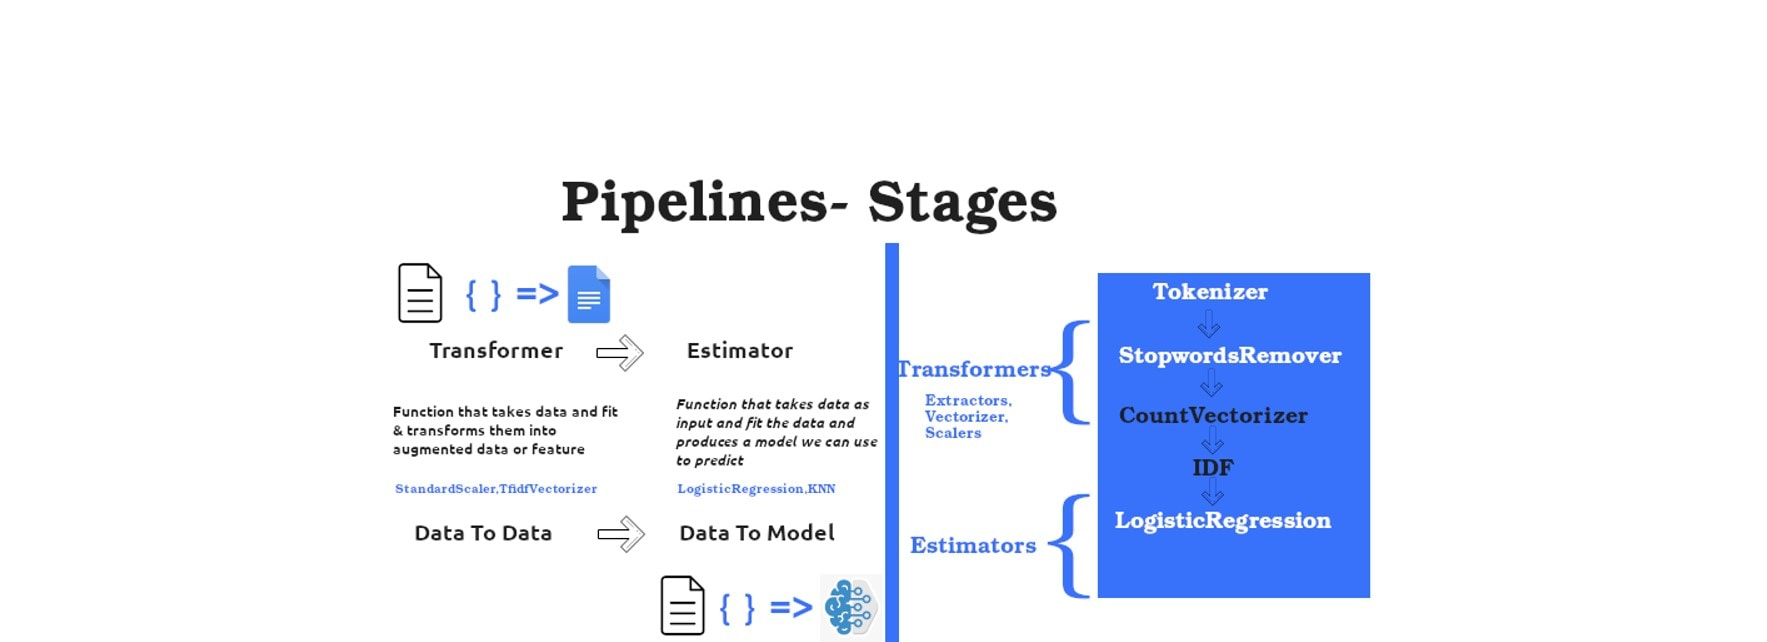

### **Regression Logistique**

## C'est l'algorithme que nous allons utiliser pour construire notre modèle. Il s'agit d'une méthode d'analyse statistique utilisée pour prédire une sortie basée sur la reconnaissance et l'analyse de formes antérieures.

## Nous aurons cinq étapes de pipeline : Tokenizer, StopWordsRemover, CountVectorizer, Inverse Document Frequency (IDF) et LogisticRegression.


## **Let’s import the packages required to initialize the pipeline stages.**




In [ ]:
from pyspark.ml.feature import Tokenizer,StopWordsRemover,CountVectorizer,IDF


### **On va aussi importer StringIndexer.**

### **StringIndexer est utilisé pour ajouter des étiquettes à notre ensemble de données. Les étiquettes sont la sortie que nous avons l'intention de prédire.**

In [ ]:
from pyspark.ml.feature import StringIndexer

## Nous devons initialiser les étapes du pipeline. Comme mentionné précédemment, notre pipeline est classé en deux : les transformateurs et les estimateurs.

### Dans cette section, nous initialisons les 4 étages présents dans la catégorie des transformateurs. Plus tard nous initialiserons la dernière étape trouvée dans la catégorie des estimateurs.

Les étages de la catégorie des transformateurs sont les suivants :

tokeniseur.
stopwords_remover.
vectoriser.
idf.

In [ ]:
tokenizer = Tokenizer(inputCol='course_title',outputCol='mytokens')
stopwords_remover = StopWordsRemover(inputCol='mytokens',outputCol='filtered_tokens')
vectorizer = CountVectorizer(inputCol='filtered_tokens',outputCol='rawFeatures')
idf = IDF(inputCol='rawFeatures',outputCol='vectorizedFeatures')

In [ ]:
labelEncoder = StringIndexer(inputCol='subject',outputCol='label').fit(df)



In [ ]:
labelEncoder.transform(df).show(5)


+--------------------+----------------+-----+
|        course_title|         subject|label|
+--------------------+----------------+-----+
|Ultimate Investme...|Business Finance|  1.0|
|Complete GST Cour...|Business Finance|  1.0|
|Financial Modelin...|Business Finance|  1.0|
|Beginner to Pro -...|Business Finance|  1.0|
|How To Maximize Y...|Business Finance|  1.0|
+--------------------+----------------+-----+
only showing top 5 rows



### On va Maintenant nemuroté toutes les étiquettes

In [ ]:
label_dict = {'Web Development':0.0,
 'Business Finance':1.0,
 'Musical Instruments':2.0,
 'Graphic Design':3.0}

### Ajouter tous ces Labels a notre Dataset

In [ ]:
df = labelEncoder.transform(df)

In [ ]:
df.show()

+--------------------+----------------+-----+
|        course_title|         subject|label|
+--------------------+----------------+-----+
|Ultimate Investme...|Business Finance|  1.0|
|Complete GST Cour...|Business Finance|  1.0|
|Financial Modelin...|Business Finance|  1.0|
|Beginner to Pro -...|Business Finance|  1.0|
|How To Maximize Y...|Business Finance|  1.0|
|Trading Penny Sto...|Business Finance|  1.0|
|Investing And Tra...|Business Finance|  1.0|
|Trading Stock Cha...|Business Finance|  1.0|
|Options Trading 3...|Business Finance|  1.0|
|The Only Investme...|Business Finance|  1.0|
|Forex Trading Sec...|Business Finance|  1.0|
|Trading Options W...|Business Finance|  1.0|
|Financial Managem...|Business Finance|  1.0|
|Forex Trading Cou...|Business Finance|  1.0|
|Python Algo Tradi...|Business Finance|  1.0|
|Short Selling: Le...|Business Finance|  1.0|
|Basic Technical A...|Business Finance|  1.0|
|The Complete Char...|Business Finance|  1.0|
|7 Deadly Mistakes...|Business Fin

### **Splitting notre dataset**

In [ ]:
(trainDF,testDF) = df.randomSplit((0.7,0.3),seed=42)

In [ ]:
trainDF

DataFrame[course_title: string, subject: string, label: double]

### **70 % de notre ensemble de données sera utilisé pour l'apprentissage  et 30 % pour les tests.**

In [ ]:
from pyspark.ml.classification import LogisticRegression

In [ ]:
lr = LogisticRegression(featuresCol='vectorizedFeatures',labelCol='label')


### Construire le **Pipeline**

In [ ]:
from pyspark.ml import Pipeline 


### **Fitting the five Etapes des transofrmations**


In [ ]:
pipeline = Pipeline(stages=[tokenizer,stopwords_remover,vectorizer,idf,lr])


### **construire le modele**

In [ ]:
lr_model = pipeline.fit(trainDF)

In [ ]:
predictions = lr_model.transform(testDF)

In [ ]:
predictions.show()

+--------------------+-------------------+-----+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+----------+
|        course_title|            subject|label|            mytokens|     filtered_tokens|         rawFeatures|  vectorizedFeatures|       rawPrediction|         probability|prediction|
+--------------------+-------------------+-----+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+----------+
|#12 Hand Coordina...|Musical Instruments|  2.0|[#12, hand, coord...|[#12, hand, coord...|(3670,[394,491,60...|(3670,[394,491,60...|[5.54102656956039...|[0.28268355868210...|       2.0|
|#7 Piano Hand Coo...|Musical Instruments|  2.0|[#7, piano, hand,...|[#7, piano, hand,...|(3670,[9,13,60,23...|(3670,[9,13,60,23...|[-6.0823322867725...|[1.03215810501627...|       2.0|
|'Greensleeves' Cr...|Musical Instruments|  2.0|['greensleeves', ...|[

In [ ]:
predictions.columns

['course_title',
 'subject',
 'label',
 'mytokens',
 'filtered_tokens',
 'rawFeatures',
 'vectorizedFeatures',
 'rawPrediction',
 'probability',
 'prediction']

In [ ]:
predictions.select('rawPrediction','probability','subject','label','prediction').show(10)


+--------------------+--------------------+-------------------+-----+----------+
|       rawPrediction|         probability|            subject|label|prediction|
+--------------------+--------------------+-------------------+-----+----------+
|[5.54102656956039...|[0.28268355868210...|Musical Instruments|  2.0|       2.0|
|[-6.0823322867725...|[1.03215810501627...|Musical Instruments|  2.0|       2.0|
|[-1.0421312486408...|[1.23270090596040...|Musical Instruments|  2.0|       2.0|
|[-2.8211817226973...|[4.77760520071682...|   Business Finance|  1.0|       1.0|
|[21.7088196964786...|[0.99999998997280...|    Web Development|  0.0|       0.0|
|[20.0054038096237...|[0.99999996031555...|    Web Development|  0.0|       0.0|
|[18.0923732265661...|[0.99999972290786...|    Web Development|  0.0|       0.0|
|[-8.4472424740876...|[4.30624176246944...|Musical Instruments|  2.0|       2.0|
|[-24.070755030458...|[7.95180520147232...|     Graphic Design|  3.0|       3.0|
|[-6.0537484536424...|[8.425

### **Evaluation du Modele **

In [ ]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

In [ ]:
evaluator = MulticlassClassificationEvaluator(labelCol='label',predictionCol='prediction',metricName='accuracy')

### Le MulticlassClassificationEvaluator utilise les colonnes Lables, de colonne et de prédiction pour calculer la précision. Si les deux colonnes correspondent, cela augmente le score de précision de notre modèle.

In [ ]:
accuracy = evaluator.evaluate(predictions)

Caluculer l'accuracy

In [ ]:
accuracy

0.9173003802281369